In [8]:
!pip install numpy --upgrade

     -------------------------------------- 61.2/61.2 kB 191.6 kB/s eta 0:00:00
   ---------------------------------------- 15.8/15.8 MB 378.3 kB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.2 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.2 which is incompatible.
tensorflow-intel 2.13.1 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.2 which is incompatible.


### Installing Dependencies

In [59]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [60]:
# The newaxis adds a new dimension, the position of the newaxis denotes which axis to add the dimension, here it is 1st
# The 2 at the end denotes that we want to select the third column and the ':' represents that we want all elements in that axis 
# Each column represents a feature here we selected only the third column
diabetes_X=diabetes_X[:,np.newaxis,2]

In [61]:
diabetes_X.shape

(442, 1)

##### Be sure to load the dataset again if you want to perform some changes with respect to the original dataset, as the current dataset is modified version of original

### Splitting the data

In [62]:
diabetes_X_train=diabetes_X[:-20]   # taking everything except the last 20 elements, before doing this do make sure data is shuffled
diabetes_X_test=diabetes_X[-20:]

diabetes_y_train=diabetes_y[:-20]
diabetes_y_test=diabetes_y[-20:]

### Defining the Model

In [63]:
regr=linear_model.LinearRegression()

### Training

In [64]:
regr.fit(diabetes_X_train,diabetes_y_train)

LinearRegression()

### Prediction on test set

In [65]:
diabetes_y_pred=regr.predict(diabetes_X_test)

### Output

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


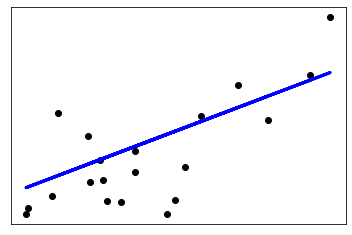

In [66]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()